<a href="https://colab.research.google.com/github/mohnabil2020/machine_learning/blob/master/Computer_vision_with_Fashion_MNIST_(UPGRADED).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I upgrade the last notebook from [HERE](https://github.com/mohnabil2020/machine_learning/blob/master/Computer_vision_with_Fashion_MNIST.ipynb) 
with convoultional and polling layer 


---



---

**My target is :**

1.   Stopping training automatically  after reaching the required accuracy ( **95%** )using callbacks class
2.  Visualizing the Convolutions and Pooling


 




In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [18]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>0.95):
                print("\nReached 95% accuracy so cancelling training!")
                self.model.stop_training = True

In [19]:
mnist = tf.keras.datasets.fashion_mnist

In [20]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
callbacks = myCallback()

In [21]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [22]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
                                    ])

In [23]:
model.compile(
                optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = 'accuracy'
              )

In [24]:
model.fit(
            training_images,
            training_labels,
            epochs=20,
            callbacks=[callbacks]
          )

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4758 - accuracy: 0.8283
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3222 - accuracy: 0.8811
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2748 - accuracy: 0.8981
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2455 - accuracy: 0.9081
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2230 - accuracy: 0.9170
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2009 - accuracy: 0.9250
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1828 - accuracy: 0.9315
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1679 - accuracy: 0.9368
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1537 - accuracy: 0.9427
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.140

In [25]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3261 - accuracy: 0.8965


[0.32608312368392944, 0.8964999914169312]

**Visualizing the Convolutions and Pooling :**


---



In [26]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


![alt text](https://camo.githubusercontent.com/8ca87390358b47865d3b583370f35fc61d9b5cdc/68747470733a2f2f7072617661726d6168616a616e2e6769746875622e696f2f6173736574732f696d616765732f66617368696f6e2d4d4e4953542f6c6162656c735f7461626c652e706e67)

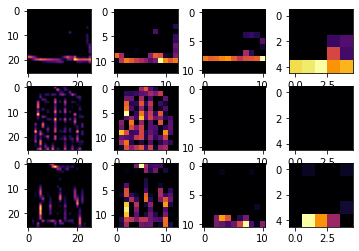

In [30]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=25
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)